95.0% credible interval (ETI): [L, U] = [0.7028458250193056, 1.1541235248247987]


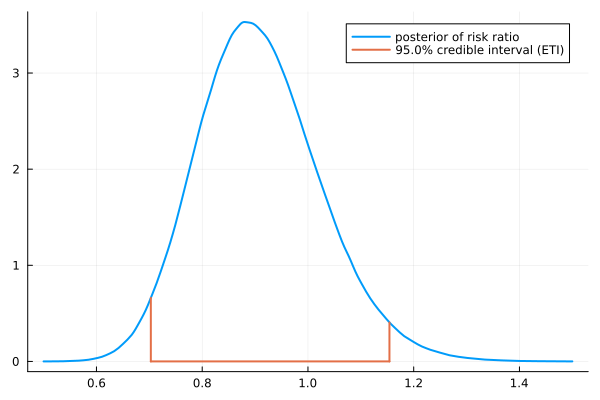

In [1]:
# https://github.com/genkuroki/public/blob/main/0029/Supplementary%20Appendix%20Figure%20S6.ipynb

using Distributions
using KernelDensity
using StatsPlots
default(fmt=:png)

data = [
    100 679-100
    111 679-111
]

a, b, c, d = data'
beta1 = Beta(1+a, 1+b) # posterior 1
beta2 = Beta(1+c, 1+d) # posterior 2

N = 10^6
R1 = rand(beta1, N)
R2 = rand(beta2, N)
RR = R1 ./ R2 # risk ratios

alpha = 0.05 # significance level or 1 - (credible level)
L, U = quantile.(Ref(RR), (alpha/2, 1 - alpha/2)) # credible limits (equal-tailed)
print("$(100(1-alpha))% credible interval (ETI): ")
@show [L, U]

ikRR = InterpKDE(kde(RR))
pdfRR(x) = pdf(ikRR, x) # pdf of the posterior of risk ratio

plot(pdfRR, 0.5, 1.5; label="posterior of risk ratio", lw=2)
plot!([L, U], zeros(2); lw=2, label="$(100(1-alpha))% credible interval (ETI)", c=2)
plot!(fill(L, 2), [0, pdfRR(L)]; lw=2, label="", c=2)
plot!(fill(U, 2), [0, pdfRR(U)]; lw=2, label="", c=2)

95.0% credible interval (HDI): [L, U] = [0.6910350666203443, 1.1391385760662731]


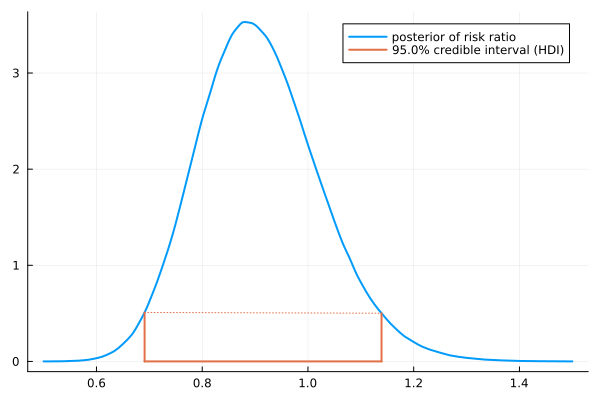

In [2]:
# highest density interval
function hti(X, alpha)
    X = sort(X)
    N = length(X)
    imax = floor(Int, alpha*N)
    i = argmin(i -> X[i+(N-imax)] - X[i], 1:imax)
    X[i], X[i+(N-imax)]
end

L, U = hti(RR, alpha)
print("$(100(1-alpha))% credible interval (HDI): ")
@show [L, U]

plot(pdfRR, 0.5, 1.5; label="posterior of risk ratio", lw=2)
plot!([L, U], zeros(2); lw=2, label="$(100(1-alpha))% credible interval (HDI)", c=2)
plot!(fill(L, 2), [0, pdfRR(L)]; lw=2, label="", c=2)
plot!(fill(U, 2), [0, pdfRR(U)]; lw=2, label="", c=2)
plot!([L, U], pdfRR.([L, U]); label="", c=2, ls=:dot)